In [2]:
import numpy as np                                       
import pandas as pd                                      
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from Get_and_Prepare_data import get_prepare
from sklearn.model_selection import train_test_split

In [3]:
df,features,target,x_train, x_test, y_train, y_test = get_prepare(source='Magic_Telescope_data.csv',stand = True,norm =True,test_size = 0.3, random_state = 15,add_ones=True)


Features: 
 ['fLen0t1:' 'fWidt1:' 'fSize:' 'fConc:' 'fConc1:' 'fAsym:' 'fM3Lon0:'
 'fM3Trans:' 'fAlp1a:' 'fDist:']

Target: 
 class 




Removing incorrect values from class
done


Removing non float values from features....
done

A total of 77 rows were removed. Their positions are :

 [172, 190, 359, 17889, 17893, 17956, 17990, 18229, 18865, 16364, 11849, 15001, 363, 489, 854, 5654, 2907, 11681, 11688, 621, 631, 707, 1107, 1714, 2080, 2301, 2972, 3169, 4665, 5678, 5689, 6014, 6211, 6659, 6758, 6771, 6922, 6953, 7031, 7342, 7577, 8981, 9168, 9537, 10056, 10673, 10826, 10934, 11139, 11733, 11811, 11865, 12501, 13614, 13989, 14709, 16870, 17124, 17128, 17213, 18013, 18470, 466, 482, 3935, 5251, 8130, 10105, 11680, 11690, 11837, 2917, 11518, 17587, 858, 8215, 8133]


x_train.shape, x_test.shape, y_train.shape, y_test.shape = (13259, 11) (5683, 11) (13259, 1) (5683, 1)


$\large Cost = -\frac{1}{m}\sum_{i=1}^m(y\times log(h(x))+(1-y)\times log(1-h(x)))$

$\large\theta = \theta_j-\frac{\alpha}{m}\sum_{i=1}^m (h(x)-y)x_j$

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fit(x,y,itera,alpha,no_of_prints=15):
    
    theta = np.ones((x.shape[1],1))
    costs=[]
    for_prints = {}
    if(no_of_prints>0):
        flag = True
        val = int(itera/no_of_prints)
    elif (no_of_prints==0):
        flag = False
    else:
        flag = True
        val = 1
    
    for i in range(itera):

        z=np.dot(x,theta)
        hypothesis = sigmoid(z)

        gradient = np.dot(x.T,(hypothesis-y))
        theta = theta - alpha*gradient
        e=1e-5
        cost = (-y * np.log(hypothesis+e) - (1 - y) * np.log(1 - hypothesis+e)).mean()
        costs.append(cost)
        
        if (flag and i % val == 0):
            print('Cost after iteration %i : %f'%(i,cost))

    return theta,costs

def predict(x,y,theta):
    z=np.array(np.dot(x,theta))
    prediction = sigmoid(z)
    for i in range(prediction.shape[0]):
        if (prediction[i]>0.5):
            prediction[i]=1
        else:
            prediction[i]=0
    return prediction

def accuracy_score(prediction,actual):
    correct=0
    for i in range(actual.shape[0]):
        if prediction[i]== actual[i]:
            correct+=1
    return correct*100/actual.shape[0]

Cost after iteration 0 : 2.841686
Cost after iteration 100 : 0.472759
Cost after iteration 200 : 0.464683
Cost after iteration 300 : 0.461256
Cost after iteration 400 : 0.459468
Cost after iteration 500 : 0.458443
Cost after iteration 600 : 0.457818
Cost after iteration 700 : 0.457415
Cost after iteration 800 : 0.457144
Cost after iteration 900 : 0.456954


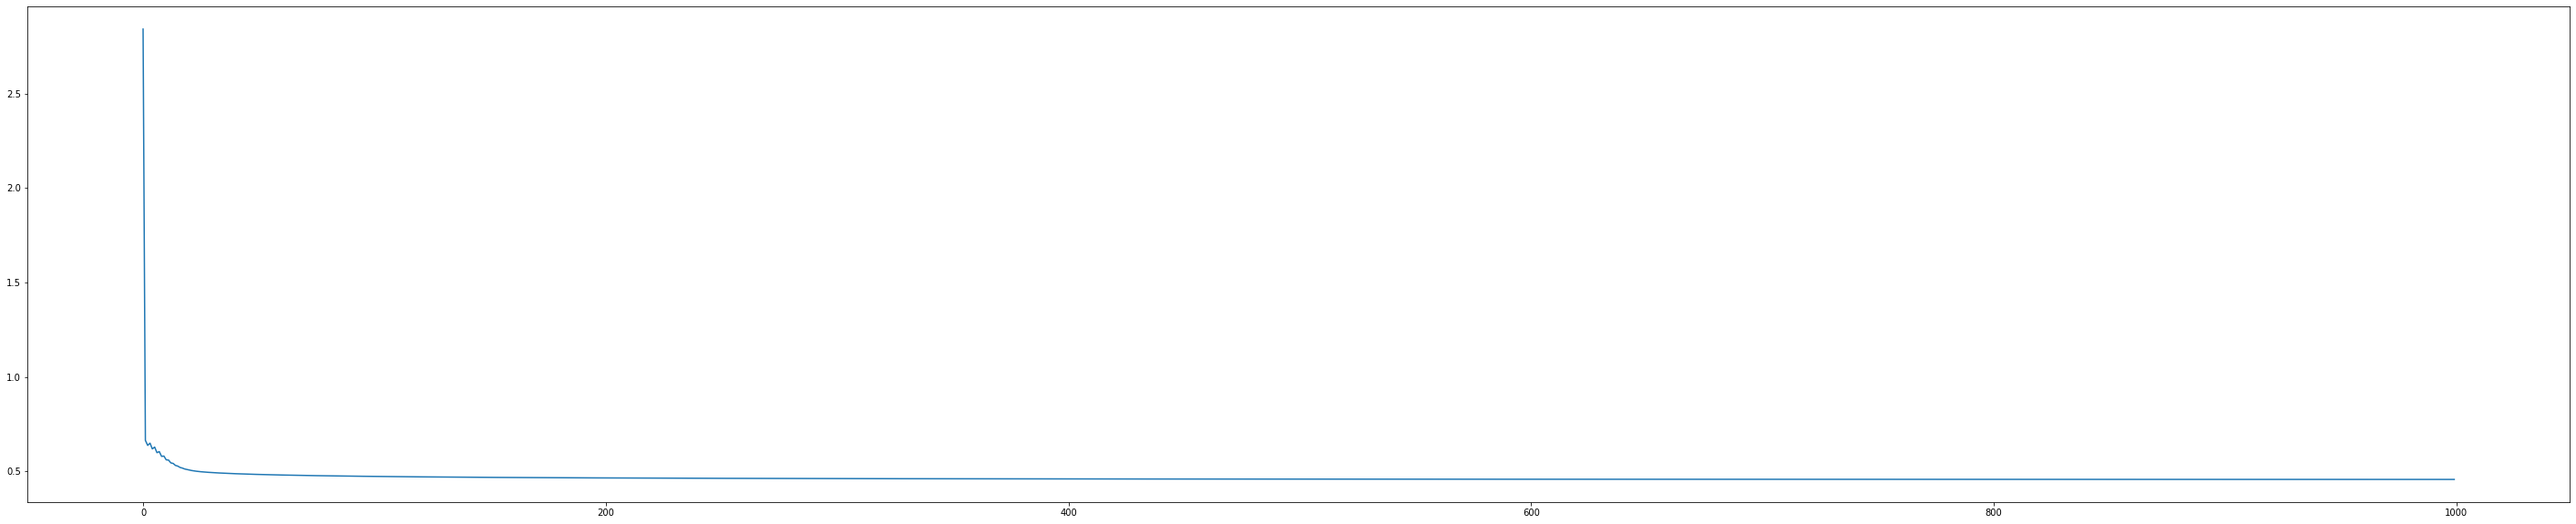


Accuracy with training data:  79.11607210196847
Accuracy with testing data:  79.0779517860285


In [22]:
itera,alpha = 1000,0.00029
theta,costs = fit(x_train,y_train,itera,alpha,no_of_prints=10)

figure(figsize=(50,10))
sns.lineplot(x=np.arange(itera),y=costs)
plt.show()

prediction  = predict(x_train,y_train,theta)
accuracy_score_train = accuracy_score(prediction,y_train)
print("\nAccuracy with training data: ",accuracy_score_train)

prediction  = predict(x_test,y_test,theta)
accuracy_score_test  = accuracy_score(prediction,y_test)
print("Accuracy with testing data: ",accuracy_score_test)